# EE5907 CA1

<function matplotlib.pyplot.show(close=None, block=None)>

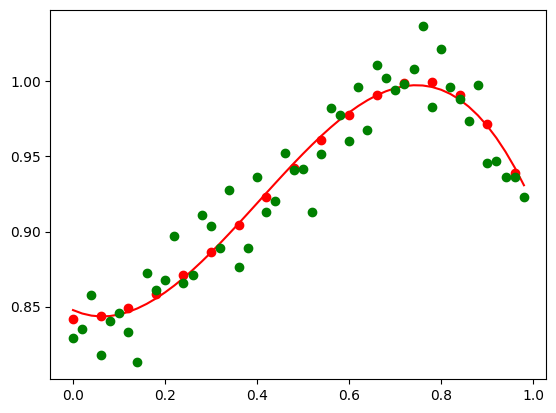

In [13]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import linalg
import random

# generate 50 2D-data points
def actual_dis():
    x = np.arange(0,1,0.02)
    y = np.sin(x**2 + 1)
    return x,y

# add Guassian noise
def add_noise(y_origin, sigma):
    mu = 0
    noise = np.random.normal(mu, sigma, len(y_origin))
    y_noise = y_origin + noise
    return y_noise

# fit the original data
def poly_fitting(x, y, M):
    z = np.polyfit(x, y, M)
    f = np.poly1d(z)
    return f

# generate original data
x_true,y_ture = actual_dis()

# fit on the original data
M1 = 3
f = poly_fitting(x_true, y_ture, M1)
#x_curve = np.linspace(x_true[0], x_true[-1],50)
x_curve = x_true
y_curve = f(x_curve)

# add_noise
y_noise = add_noise(y_curve,0.02)
x_noise = x_curve

# show the plot
plt.plot(x_true, y_ture, 'ro',markevery=3)
plt.plot(x_curve, y_curve, 'red')
plt.plot(x_noise, y_noise, 'go')
plt.show

### Part 1 MAP 

while M = 3
 ω = [[ 0.84057937]
 [-0.10222133]
 [ 1.14207379]
 [-0.96935128]]
 absolute error value = 3.3769305194567196


C:\Users\spica\AppData\Local\Temp\ipykernel_16712\3098135910.py:17: LinAlgWarning: Ill-conditioned matrix (rcond=2.3531e-17): result may not be accurate.
  tmp = linalg.solve(mxxo, mx.T)


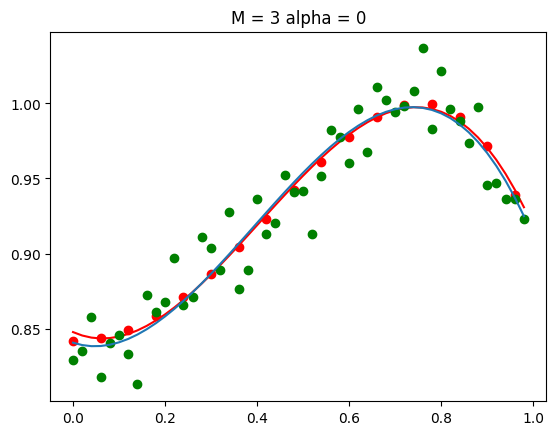

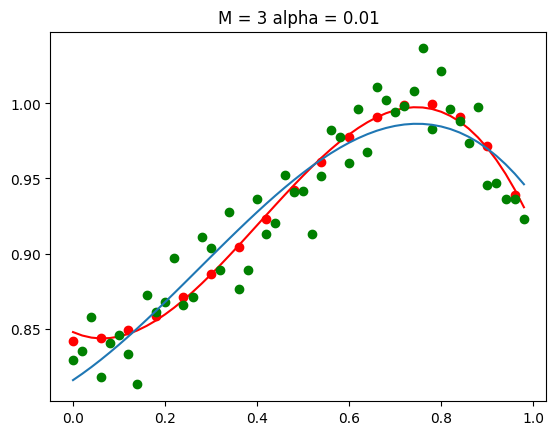

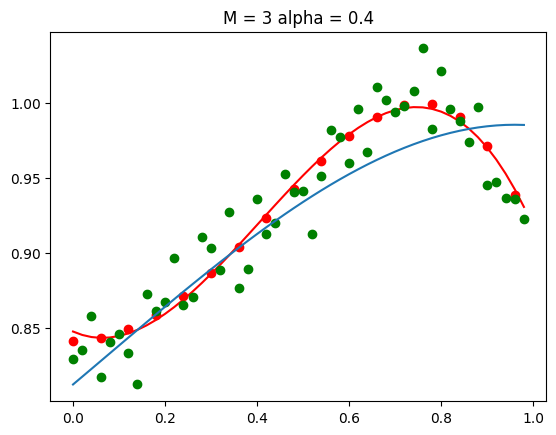

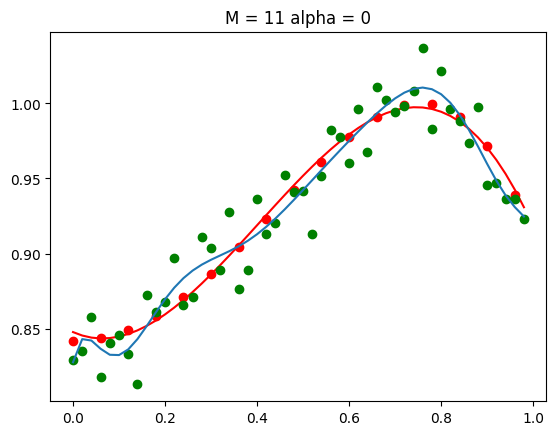

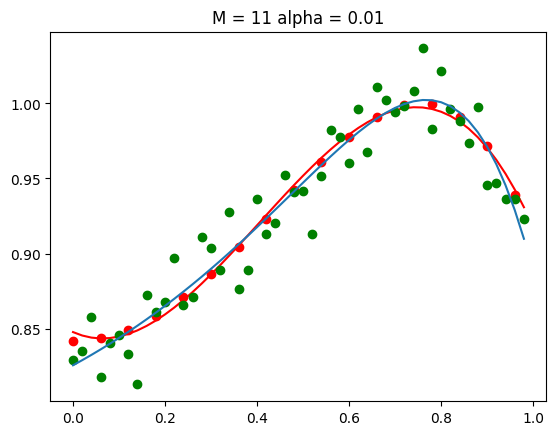

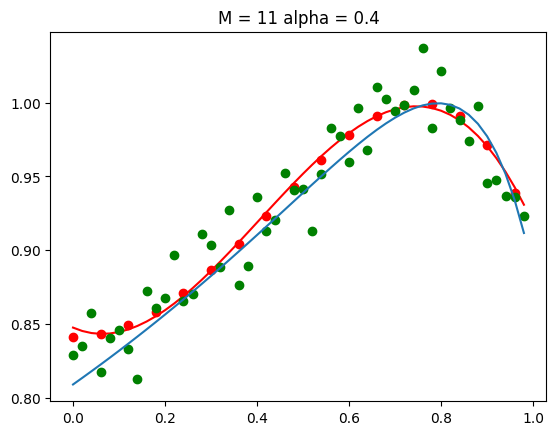

In [14]:

def map_fitting(x,y,M,alpha):
    N = len(x)
    mx = np.zeros([N,M+1])
    vy = np.zeros([N,1])
    ii = np.identity(M+1)
    
    
    # polynomial function
    for n in range(0, N):
        for m in range(0, M+1): 
            mx[n][m] = np.power(x[n],m)
        vy[n][0] = y[n]
    
    # optimization
    mxx = np.dot(mx.T,mx)
    mxxo = mxx + alpha*ii
    tmp = linalg.solve(mxxo, mx.T)
    
    w = np.dot(tmp, vy)
    
    return w

def map_plot(x,w):
    M = len(w)-1
    N = len(x)
    
    mx = np.zeros([N,M+1])
    for n in range(0, N):
        for m in range(0, M+1):
            mx[n][m] = np.power(x[n],m)
    y = np.dot(mx,w)
    return x, y

# draw plots with different parameters M and alpha
temp=1
for M2 in [3,11]:
    for alpha in [0,0.01,0.4]:
        w = map_fitting(x_noise, y_noise, M2, alpha)
        [x_map, y_map] = map_plot(x_curve, w)
        if(M2 == 3 and alpha == 0):
            abs_w = linalg.norm(w - f, 2)
            print("while M = "+ str(M2) + "\n ω = " + str(w) + "\n absolute error value = " + str(abs_w))
        # plot
        temp = temp+1
        plt.figure(temp)
        plt.title("M = "+str(M2)+" alpha = "+str(alpha))
        plt.plot(x_true, y_ture, 'ro',markevery=3)
        plt.plot(x_curve, y_curve, 'red')
        plt.plot(x_noise, y_noise, 'go')
        plt.plot(x_map, y_map)
        plt.show
            

### Part 2 Basis Function

C:\Users\spica\AppData\Local\Temp\ipykernel_16712\418511471.py:23: LinAlgWarning: Ill-conditioned matrix (rcond=1.03464e-17): result may not be accurate.
  tmp = linalg.solve(mphi, phi.T)
C:\Users\spica\AppData\Local\Temp\ipykernel_16712\418511471.py:23: LinAlgWarning: Ill-conditioned matrix (rcond=3.57996e-18): result may not be accurate.
  tmp = linalg.solve(mphi, phi.T)
C:\Users\spica\AppData\Local\Temp\ipykernel_16712\418511471.py:23: LinAlgWarning: Ill-conditioned matrix (rcond=6.50145e-19): result may not be accurate.
  tmp = linalg.solve(mphi, phi.T)
C:\Users\spica\AppData\Local\Temp\ipykernel_16712\418511471.py:23: LinAlgWarning: Ill-conditioned matrix (rcond=7.95146e-21): result may not be accurate.
  tmp = linalg.solve(mphi, phi.T)
C:\Users\spica\AppData\Local\Temp\ipykernel_16712\418511471.py:23: LinAlgWarning: Ill-conditioned matrix (rcond=4.25081e-20): result may not be accurate.
  tmp = linalg.solve(mphi, phi.T)


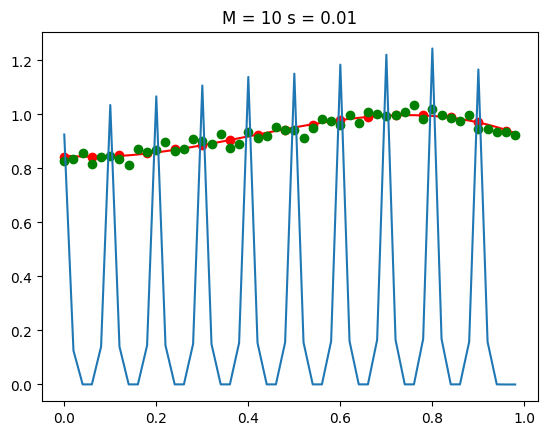

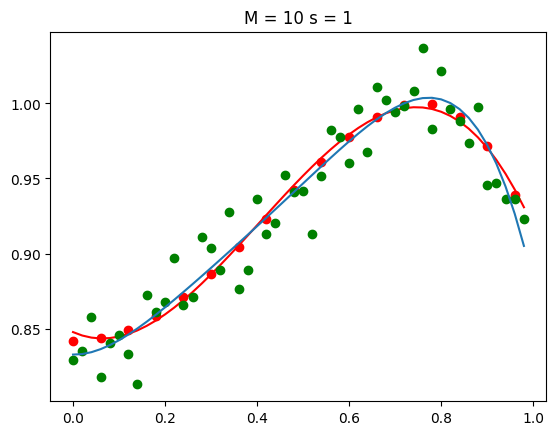

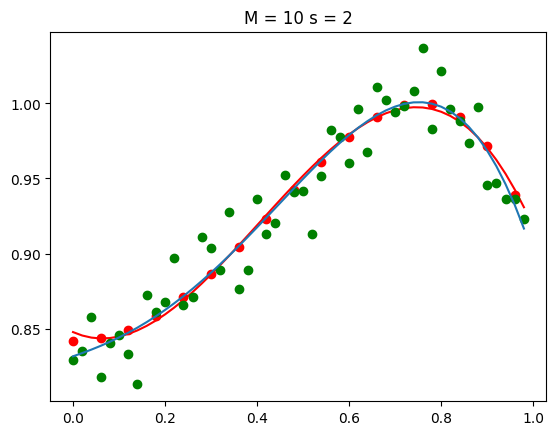

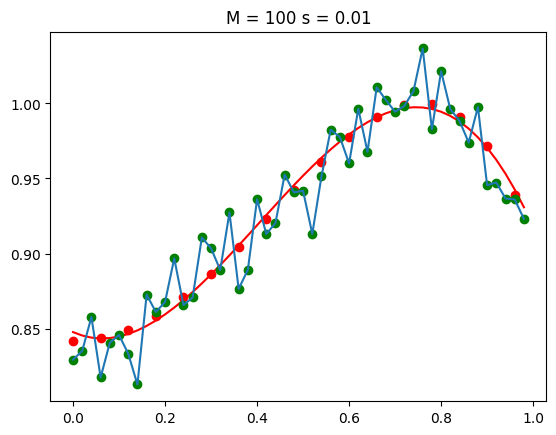

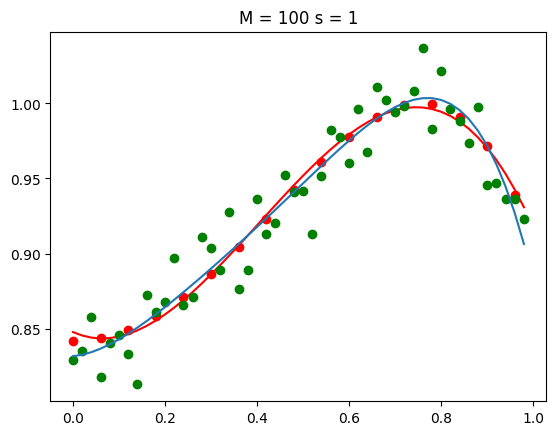

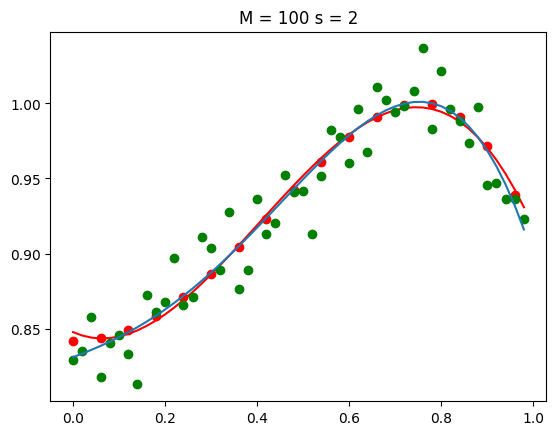

In [15]:
def guassian_basis(x, mu, s):
    return np.exp(-1 * linalg.norm(mu - x)**2 / (2 * s ** 2))

def mle_basis_func(x, y, M, s):
    N = len(x)
    phi = np.zeros([N,M])
    vy = np.zeros([N,1])
    
    # calculate the guassian_basis matrix
    for m in range(M):
        mu = m/M
        phi[:, m] = np.vectorize(guassian_basis)(x, mu, s)
    
    for n in range(0, N):
        vy[n][0] = y[n]
        
    # mphi = np.dot(phi.T, phi)
    # imphi = linalg.inv(mphi)
    # tmp = np.dot(imphi, phi.T)
    
            
    mphi = np.dot(phi.T, phi)
    tmp = linalg.solve(mphi, phi.T)
    
    # tmp = linalg.pinv(phi)
    w = np.dot(tmp, vy)
    return w, phi

def mle_basis_plot(x,w,s):
    M = len(w)
    N = len(x)
    phi = np.zeros([N,M])
    
    for m in range(M):
        mu = m/M
        phi[:, m] = np.vectorize(guassian_basis)(x, mu, s)
                
    y = np.dot(phi, w)
    return x, y

temp=1
for M2 in [10,100]:
    for s in [0.01,1,2]:
        [w, phi_guas] = mle_basis_func(x_noise, y_noise, M2, s)
        [x_map, y_map] = mle_basis_plot(x_curve, w, s)
        # plot
        temp = temp+1
        plt.figure(temp)
        plt.title("M = "+str(M2)+" s = "+str(s))
        plt.plot(x_true, y_ture, 'ro',markevery=3)
        plt.plot(x_curve, y_curve, 'red')
        plt.plot(x_noise, y_noise, 'go')
        plt.plot(x_map, y_map)
        plt.show



KeyboardInterrupt: 

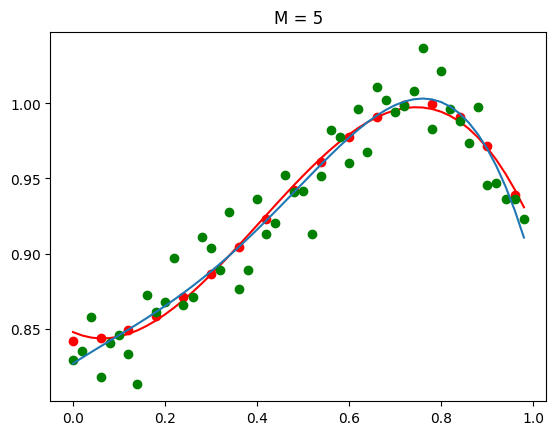

In [16]:
def sigmoid_basis(x, mu ,s):
    sigmoid = 1 / (1 + np.exp(-(x - mu) / s))
    return sigmoid

def mle_sig_basis_func(x, y, M, s):
    N = len(x)
    phi = np.zeros([N,M])
    vy = np.zeros([N,1])
    
    # calculate the guassian_basis matrix
    for m in range(M):
        mu = m / M * x[-1]
        phi[:, m] = np.vectorize(sigmoid_basis)(x, mu ,s)
    
    for n in range(0, N):
        vy[n][0] = y[n]
    
    tmp = linalg.pinv(phi)
    w = np.dot(tmp, vy)
    return w, phi

def mle_sig_basis_plot(x,w,s):
    M = len(w)
    N = len(x)
    phi = np.zeros([N,M])
    
    for m in range(M):
        mu = m / M * x[-1]
        phi[:, m] = np.vectorize(sigmoid_basis)(x, mu ,s)
                
    y = np.dot(phi, w)
    return x, y

temp=1
s = 1
for M2 in [5,5000]:
    [w, phi_sig] = mle_sig_basis_func(x_noise, y_noise, M2 ,s)
    [x_map, y_map] = mle_sig_basis_plot(x_curve, w ,s)
    # plot
    temp = temp+1
    plt.figure(temp)
    plt.title("M = "+str(M2))
    plt.plot(x_true, y_ture, 'ro',markevery=3)
    plt.plot(x_curve, y_curve, 'red')
    plt.plot(x_noise, y_noise, 'go')
    plt.plot(x_map, y_map)
    plt.show

In [ ]:
# generate 50 2D-data points
def actual_dis_new():
    x = np.arange(0,9,0.18)
    y = (0.4345 * (x ** 3)) - (5.607 * (x ** 2)) + (16.78 * x) - 10.61
    return x, y

# generate original data
x_true_new,y_ture_new = actual_dis_new()

# fit on the original data
M1 = 3
f = poly_fitting(x_true_new, y_ture_new, M1)
#x_curve = np.linspace(x_true[0], x_true[-1],50)
x_curve_new = x_true_new
y_curve_new = f(x_curve_new)

# add_noise
y_noise_new = add_noise(y_curve_new,2)
x_noise_new = x_curve_new


In [ ]:
M2 = 10
s = 10
[w, phi_guas] = mle_sig_basis_func(x_noise_new, y_noise_new, M2, s)
[x_map_new, y_map_new] = mle_sig_basis_plot(x_curve_new, w ,s)
# plot
plt.figure(temp)
plt.title("M = "+str(M2)+" s = "+str(s))
plt.plot(x_true_new, y_ture_new, 'ro',markevery=3)
plt.plot(x_curve_new, y_curve_new, 'red')
plt.plot(x_noise_new, y_noise_new, 'go')
plt.plot(x_map_new, y_map_new)
plt.show

### Part 3 Full bayesian regression

In [ ]:
def fb_fitting(x, y, M, s, alpha, beta):
    N = len(x)
    phi = np.zeros([N,M])
    vy = np.zeros([N,1])
    ii = np.identity(M)
    
    # calculate the guassian_basis matrix
    for m in range(M):
        mu = m/M
        phi[:, m] = np.vectorize(guassian_basis)(x, mu, s)
    
    for n in range(0, N):
        vy[n][0] = y[n]
     
    # optimization
    mphi = np.dot(phi.T,phi)
    mphio = beta * mphi + alpha * ii
    ssn = linalg.solve(mphio,phi.T)
    
    w = beta * np.dot(ssn, vy)

    return w, ssn

def fb_plot(x, w, s):
    M = len(w)
    N = len(x)
    phi = np.zeros([N,M])
    
    for m in range(M):
        mu = m/M
        phi[:, m] = np.vectorize(guassian_basis)(x, mu, s)
                
    y = np.dot(phi, w)
    return x, y

M2 = 11
s = 0.5
alpha = 0.01 
beta =  1

[w, ssn] = fb_fitting(x_noise, y_noise, M2, s, alpha, beta)
[x_map, y_map] = fb_plot(x_curve, w, s)
# plot
plt.figure(temp)
plt.title(" M = " + str(M2) + " s = " + str(s) + " alpha = " + str(alpha) + " beta = " + str(beta))
plt.plot(x_true, y_ture, 'ro',markevery=3)
plt.plot(x_curve, y_curve, 'red')
plt.plot(x_noise, y_noise, 'go')
plt.plot(x_map, y_map)
plt.show



    
    

α and β is the Variance of prior **p(ω)** and likelihood **p(t|ω)**, which will effect the variance of **p(t)** and **p(ω|t)** according to the marginal and conditional guassain disturbution.

The disturbution of the posterior distribution **p(ω|t)** shows how credible is the w we derived. If the desity around the mode is too low, that indicates the prior and likelihood is poor.

### Predictive distribution

In [ ]:
# predictive distribution
def predictive_dis(beta, x, snn, Mn, s, M, n) -> list:
    N = len(x)
    phi = np.zeros([N,M])
    sx = np.zeros(50) # variance of t*
    Mx = np.zeros(50) # mean of t*
   
    
    for m in range(M):
        mu = m / M
        phi[:, m] = np.vectorize(guassian_basis)(x, mu ,s)
    
    for nn in range(N):                            
        sx[nn] = 1.0/beta + np.dot(np.dot(phi[nn, :], snn[n]), phi[nn, :].T)
        Mx[nn] = np.dot(Mn[:,n].T, phi[nn, :].T)
    
    return sx, Mx

# sequence learning
def sequence_learning(x, y ,alpha, beta, s, M):
    N = len(x)
    ssn = np.zeros([N+1, M, M])
    ssn[0, :, :] = linalg.inv(alpha * np.identity(M))
    Mn = np.zeros([M, N+1])
    
    for n in range(N):
        
        xn = np.zeros(n+1)
        xn = x[0:n+1]
        phi = np.zeros([n+1,M])
        
        for m in range(M):
            mu = m / M 
            phi[:, m] = np.vectorize(guassian_basis)(xn, mu ,s)
            
        issn = linalg.solve(ssn[n,: ,:], np.identity(M)) + beta * np.dot(phi.T, phi)
        ssn[n+1,: ,:] = linalg.solve(issn, np.identity(M))
        
        tmp = np.dot(linalg.solve(ssn[n, :, :], np.identity(M)), Mn[:, n]) + beta * np.dot(phi.T, y[:n+1])
        Mn[:, n+1] = np.dot(ssn[n+1], tmp)
    
    return ssn, Mn

# plot the predictive dist. one by one
def predictive_plot(x, y , s, alpha, beta, M) -> list:
    x_new = np.zeros(50)
    y_new = np.zeros(50)
    li = np.arange(50)
    random.shuffle(li)
    pi = 0
    N = len(x)
    sx = np.zeros(50)
    Mx = np.zeros(50)
    
    
    for i in li:
        x_new[pi] = x[i]
        y_new[pi] = y[i]
        pi = pi + 1
    
    [ssn, Mn] = sequence_learning(x_new, y_new, alpha, beta, s, M)
    
    for n in range(50):
#    for n in [50]:
        [sx, Mx] = predictive_dis(beta, x_noise, ssn, Mn, s, M, n)
        
        
        # plot
        plt.figure(n+1)
        plt.plot(x_new, y_new, 'go')
        # plt.plot(x_noise, Mx, 'bo')
        plt.plot(x_noise, Mx, 'blue')
        plt.errorbar(x_noise, Mx, sx ,fmt="o")
        plt.plot(x_curve, y_curve, 'red')
        plt.show()
        print(li[:n+1])
        
    
    return sx, Mx, ssn, Mn

s = 0.5
alpha = 0.01
beta = 20
M2 = 20
sx = np.zeros(50)
Mx = np.zeros(50)

[sx, Mx, ssn_2, Mn_2] = predictive_plot(x_noise, y_noise, s, alpha, beta, M2)
        
        
    

In [ ]:
for n in [50]:
        [sx, Mx] = predictive_dis(beta, x_noise, ssn, Mn, s, M, n)
        
        
        # plot
        plt.figure(n+1)
        plt.plot(x_new, y_new, 'go')
        # plt.plot(x_noise, Mx, 'bo')
        plt.plot(x_noise, Mx, 'blue')
        plt.errorbar(x_noise, Mx, sx ,fmt="o")
        plt.plot(x_curve, y_curve, 'red')
        plt.show()
        print(li[:n+1])
        
    
    return sx, Mx, ssn, Mn

s = 0.5
alpha = 0.01
beta = 20
M2 = 20
sx = np.zeros(50)
Mx = np.zeros(50)

[sx, Mx, ssn_2, Mn_2] = predictive_plot(x_noise, y_noise, s, alpha, beta, M2)
        
        
    

### Part 4 Classification

In [ ]:
N1 = 50
N2 = 50
N3 = 50
K = 2
sigma = 0.1


mean = (3,3)
cov = [[sigma, 0], [0, sigma]]
X1 = np.random.multivariate_normal(mean, cov, N1)
c1 = [ 'red'] * len(X1)

mean = (5,5)
X2 = np.random.multivariate_normal(mean, cov, N2)
c2 = ['blue'] * len(X2)

mean = (8,3)
X3 = np.random.multivariate_normal(mean, cov, N3)
c3 = ['blue'] * len(X3)

X = np.concatenate( (X1, X2, X3) )
color = np.concatenate( (c1, c2, c3) )

T = np.zeros([len(X)])
for n in range(0,len(X)):
    if(n < len(X1)) :
        T[n] = 1
    if(n >= N1 and n < len(X1) + len(X2) + len(X3)):
        T[n] = 1
        
T = T.astype (int)

# x_mode = np.zeros(2)
# x_mode[0] = np.mean(X[:,0])
# x_mode[1] = np.mean(X[:,1])
# print(x_mode)


plt.scatter(X[:, 0], X[:, 1], marker = 'o', c = color )
# plt.scatter(x_mode[0], x_mode[1], marker = 'o', c = "green" )
plt.show( )

In [ ]:
def guassian_basis_clf(x, mu, s):
    N = len(x)
    phi = np.zeros(N)
    for n in N:
        phi[n] =  np.exp(-1 * linalg.norm(mu - x[n,:], 2)**2 / (2 * s ** 2))

def predictive_clf_fitting(x, t):
    
    alpha = 0.01
    M = 2
    s = 0.1
    
    N = len(x)
    phi = np.zeros([N,M])
    sig = np.zeros([N,1])
    sig_map = np.zeros([N,1])
    
    # basis_func
    for m in range(M):
        mu = m/M *10
        phi[:, m] = np.vectorize(guassian_basis_clf)(x, mu, s)
         
    # sigmoid_func
    sig[:,0] = np.vectorize(sigmoid_basis)(np.zeros(N), 0, 1)
    
        
    # w_map
    iss0 = 1/alpha * np.identity(M)
    R = np.dot(sig, (np.ones([N,N])-sig).T)
    H = iss0 + phi @ R @ phi.T
    iH = linalg.solve(H, np.identity(M))
    w_map = W- iH @ (iss0 @ (0 - 0)) + phi.T(sig - t)       #to do
    
    # ssn
    sig_map[:,0] = np.vectorize(sigmoid_basis)(np.dot(w_map.T, phi), 0, 1)
    R_map = np.dot(sig_map, (np.ones([N,N])-sig_map).T)
    H_map = iss0 + phi @ R_map @ phi.T
    ssn = linalg.solve(H_map, np.identity(M))
    
    # final

    
    return w_map, ssn
   
def predictive_clf_testing(x_new, w_map, ssn):
    M = 2
    phi_new = np.zeros([M,1])
    
    for m in range(M):
        mu = m/M * 10
    phi_new[:,0] = guassian_basis(x_new, mu ,s)
         
    a_map = np.dot(w_map.T, phi_new)
    sigma = phi_new.T @ ssn @ phi_new
    
    tmp = a_map / ((1 + (np.pi / 8) * sigma ) ** (1/2))
    p_dist = sigmoid_basis(tmp ,0 ,1)


[w_wap, ssn] = predictive_clf_fitting(X,T)